# Exploratory Data Analysis on Fish Kills in Florida

In this notebook I will be briefly exploring the Fish Kill dataset. The dataset was generated via a report from the Florida Fish and Wildlife Conservation Commission and contains data on reported sightings of fish kills across a myriad of cities and counties in Florida. The data collected, spans March 2nd 2000 to March 1st 2020.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import Roboto_Condensed_Bold
%matplotlib inline

data = pd.read_csv("data/FishKillResultReport.csv")
data = data.set_index("Call ID")
data.head()

,Water Body Name,City,Call Category,County,Date ID,Comments,Report Date
Call ID,,,,,,,
2271,Bridge & RR Tracks,Port Charlotte,Mammal / Turtle,Charlotte,30200,Manatee,3/2/2000
2272,Bear Creek Bayou,Pensacola,Fish Kill,Escambia,30200,"Catfish, Elwie, Gar, Jellies",3/2/2000
2275,Unknown Water Body,Unknown,Fish Kill,Unknown,30600,Grouper,3/6/2000
2276,Dunns Creek,Jacksonville,Abnormal Appearance,Duval,30600,Species Unknown,3/6/2000
2278,On Beach Gulf Shore Blvd,Naples,Fish Kill,Collier,30700,Species Unknown,3/7/2000


**The first thing that I will explore is which cities have the most reported fish kills**

Text(0.5, 0, 'Reported Fish Kills')

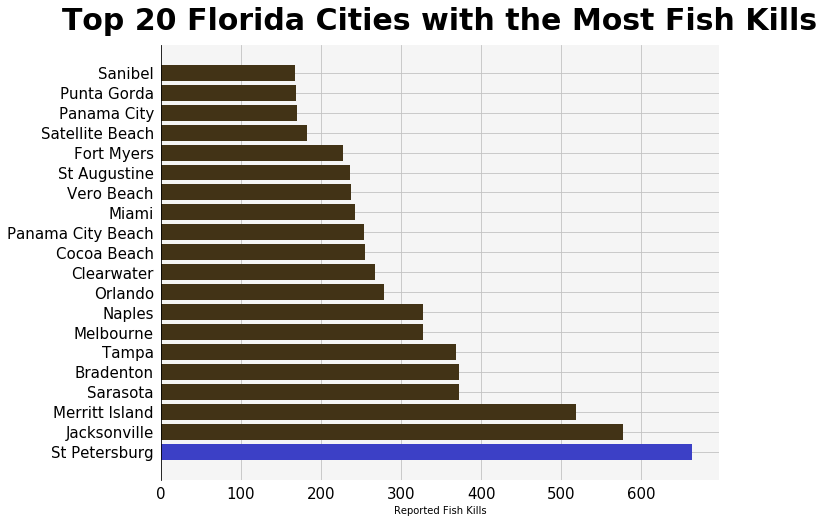

In [78]:
fk = data[data['Call Category'] == 'Fish Kill'].groupby(['City']).size().sort_values(ascending = False)
color = [" "] * 20
for col in range(len(color)):
    color[col] = '#423316'
color[0] = '#3c40c6'
plt.figure(figsize=(10,8))
plt.barh(fk.index[0:20], fk.values[0:20], color=color)
plt.title("Top 20 Florida Cities with the Most Fish Kills")
plt.xlabel("Reported Fish Kills")

As expected the cities with the most fish kills are all located in close proximity with a beach as that is where the most fish kills are observed.

**Which fish have been reported the most?**

Text(0.5, 0, 'Reported Fish Kills')

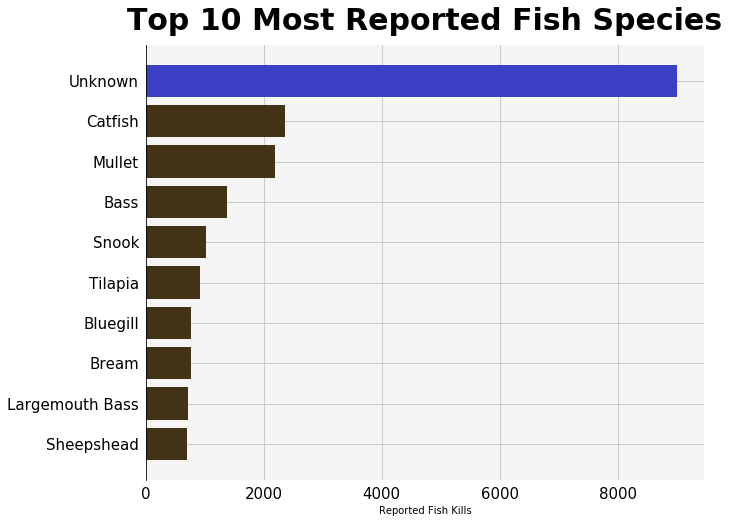

In [197]:
# Create copy of original data
fish = data.copy()
# Just want the comments section for fish types
fish = fish['Comments']
# Drop rows with no comments
fish = fish.dropna()
# Reset Index and drop the old index
fish = fish.reset_index().drop(columns = 'Call ID')
# List to store the rows that will need to be dropped
drop_fish = []
# Used to iterate over original length of list
length = len(fish.values)

# Iterates over list and adds the comments with multiple fish
for i in range(length):
    if fish.loc[i].values[0].find(',') != -1:
        frame = pd.DataFrame({"Comments": [fish.loc[i].values[0].split(', ')]}, index = [len(fish)+1])
        fish = fish.append(frame)
        drop_fish.append(i)
        
# Drop the repeated fish
fish = fish.drop(index = drop_fish)
fish = fish.explode("Comments")
fish.tail()

fish_plot = fish['Comments'].value_counts()
fish_plot['Unknown'] = fish_plot['Species Unidentified'] + fish_plot['Species Unknown']
fish_plot = fish_plot.drop(index = ['Species Unidentified', 'Species Unknown'])
fish_plot = fish_plot.sort_values(ascending = False)
fish_plot = fish_plot[0:10].sort_values()

color = [" "] * 10
for col in range(len(color)):
    color[col] = '#423316'
color[9] = '#3c40c6'

plt.figure(figsize=(10,8))
plt.barh(fish_plot.index, fish_plot.values, color = color)
plt.title("Top 10 Most Reported Fish Species")
plt.xlabel("Reported Fish Kills")

Clearly, for most reported fish kills the species in either unknown or unidentified.

**Reported Fish Kills Over Time**

Text(0.5, 0, 'Year (2000-2019)')

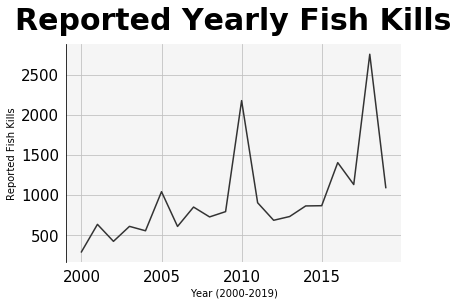

In [229]:
# Create a copy of original dataframe
timeline = data.copy()
# Segment data for only fish kills
timeline = timeline[timeline['Call Category'] == 'Fish Kill']
# Convert Report Date to datetime
timeline['Report Date'] = pd.to_datetime(timeline['Report Date'], format = '%m/%d/%Y')
# Rename Columns
timeline = timeline.rename(columns = {'Report Date': 'Report_Date'})
# Group by year and counts for each year
timeline_plot = timeline['Report_Date'].dt.year.value_counts().sort_index().drop(index = 2020)

#Plot
plt.plot(timeline_plot.index, timeline_plot.values)
plt.title("Reported Yearly Fish Kills")
plt.ylabel("Reported Fish Kills")
plt.xlabel("Year (2000-2019)")